In [11]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Problem 1

The function is defined below.

In [12]:
def f1(x):
    return x ** 2 + 3 * x + 8

We need to search for the minimum of this function in the range [-5, 5] using gradient descent. So first we will define a function which is the derivative of the function f1(x).

In [13]:
def df1_dx(x):
    return 2 * x + 3

Now, we need to make another function that takes in input as the function f(x), its derivative, the start and end of the range that we are searching in, the learning rate (i.e. the step size), the number of iterations, and the initial guess for x.

In [14]:
def grad_desc(f, df, start, end, step, n, guess):
    # guess should be within our search range
    guess = max(start, min(end, guess))
    x = guess
    for _ in range(n):
        grad = df(x)
        x = x - (step * grad)
        # again ensure that x remains in our search range
        x = max(start, min(end, x))
        
    return x

We use the generic grad_desc() function that I have defined above to find the optimum value of x for which the function f1(x) is minimum.

In [6]:
start_range = -5
end_range = 5
learning_rate = 0.1
iterations = 100
initial_guess = 4
op_x = grad_desc(f1, df1_dx, start_range, end_range, learning_rate, iterations, initial_guess)
print("The function takes minimum value", f1(op_x), "at x = ", op_x)

The function takes minimum value 5.75 at x =  -1.49999999887963


Now, let us set up the plot and the animation so that we can visualise it.

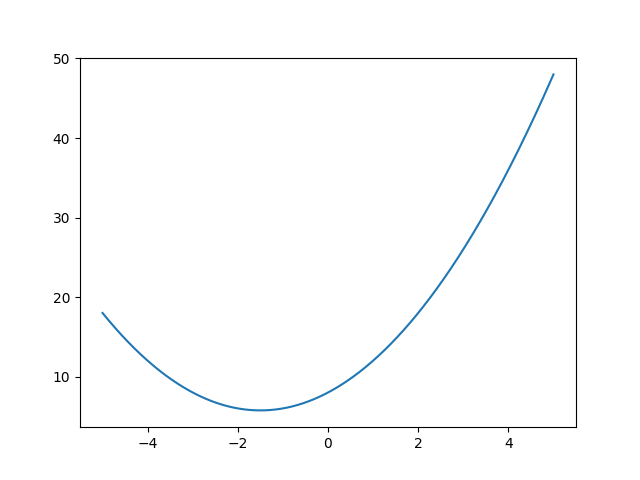

In [7]:
# Create the axis and function
xbase = np.linspace(-5, 5, 500)
ybase = f1(xbase)
plt.plot(xbase, ybase)

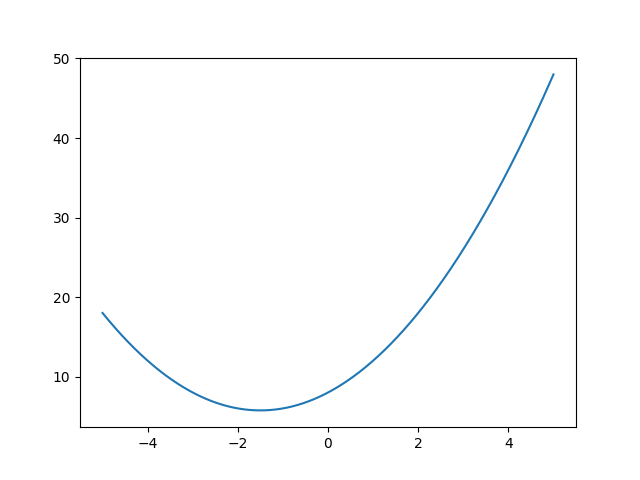

In [8]:
# Create a figure and axis for the animation

# Modifying given code. 
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 4
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

# function that acts as a feeder function to FuncAnimate so that we can animate our gradient descent based optimization
def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df1_dx(bestx) * lr 
    bestx = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    
ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=100, repeat=False)
plt.show()

# Problem 2

The function as well as its derivatives are defined below.

In [45]:
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

And the range for both x and y is [-10, 10]

Now, let us define a generic function that performs gradient descent. It will take as input the following parameters:
- f: The function to optimize
- dfx: The derivative of the function with respect to x
- dfy: The derivative of the function with respect to y
- start_x: The starting value of x for the search
- end_x: The ending value of x for the search
- start_y: The starting value of y for the search
- end_y: The ending value of y for the search
- guess_x: The initial guess for the optimum in the x-axis
- guess_y: The initial guess for the optimum in the y-axis
- step: The learning rate for gradient descent
- n: The number of iterations to perform

In [48]:
def grad_desc_2d(f, dfx, dfy, start_x, end_x, start_y, end_y, guess_x, guess_y, step, n):
    x = guess_x
    y = guess_y
    
    # Create a plot to visualize the optimization path
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x_range3 = np.linspace(start_x, end_x)
    y_range3 = np.linspace(start_y, end_y)
    
    X, Y = np.meshgrid(x_range3, y_range3)
    Z = f(X, Y)
    
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4)
    
    for _ in range(n):
        grad_x = dfx(x, y)
        grad_y = dfy(x, y)
        x = x - (step*grad_x)
        y = y - (step*grad_y)
        # To ensure that the updated values of x and y are within the search range
        x = max(start_x, min(x, end_x))
        y = max(start_y, min(y, end_y))
        ax.scatter(x, y, f(x, y), c = 'red')
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.title('Gradient Descent Path')
    plt.show()
        
    return x, y, f(x,y)

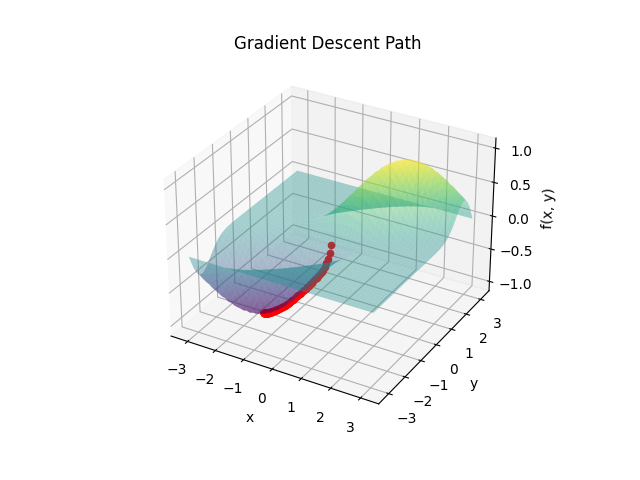

In [47]:
def onestepderiv_2d(frame):
    global bestcost, bestx, besty, lr
    x = bestx - df3_dx(bestx) * lr 
    y = besty - df3_dy(bestx) * lr 
    bestx = x
    besty = y
    z = f3(x, y)
    ax.scatter(x, y, z, c = 'red', marker = 'o', s = 250)
    
ani = FuncAnimation(fig, onestepderiv_2d, frames=range(100), interval=100, repeat=False)
plt.show()

We use this function to find the optimum value of the function f3(x, y). 

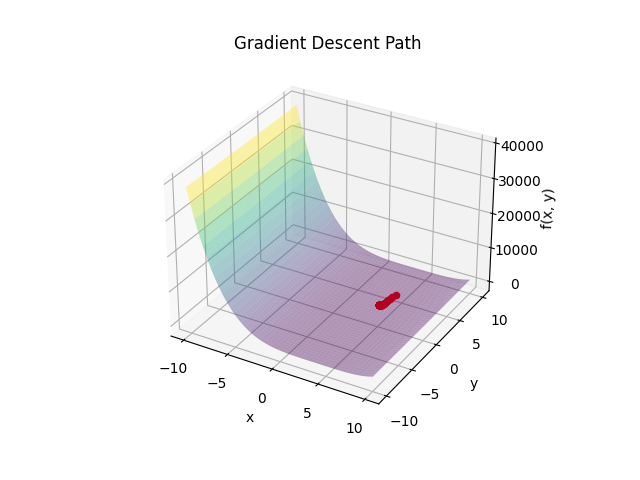

In [49]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
initial_guess_x3 = 5
initial_guess_y3 = 5
learning_rate3 = 0.1
num_iterations3 = 1000

# Optimize the function f3
plt.cla()
optimal_x3, optimal_y3, opz = grad_desc_2d(f3, df3_dx, df3_dy, xlim3[0], xlim3[1], ylim3[0], ylim3[1],
                                      initial_guess_x3, initial_guess_y3, learning_rate3, num_iterations3)

In [50]:
# Print the optimal solution
print("Optimal x:", optimal_x3, "Optimal y:", optimal_y3)
print("Optimized value of f3(x, y) is", f3(optimal_x3, optimal_y3))

Optimal x: 4.035235174181332 Optimal y: 2.000000000000001
Optimized value of f3(x, y) is 2.0000015413659185


# Problem 3

The function is defined below

In [40]:
def f4(x,y):
    return np.exp(-(x - y)**2) * np.sin(y)

def df4_dx(x, y):
    return -2 * np.exp(-(x - y)**2) * np.sin(y) * (x - y)

def df4_dy(x, y):
    return np.exp(-(x - y)**2) * np.cos(y) + 2 * np.exp(-(x - y)**2) * np.sin(y)*(x - y)

We can use the gradient descent function for 2D that we defined in problem 2.

In [43]:
xlim4 = [-np.pi, np.pi]
ylim4 = [-np.pi, np.pi]

initial_x4 = 0
initial_y4 = 0
learning_rate4 = 0.1
num_iterations4 = 100

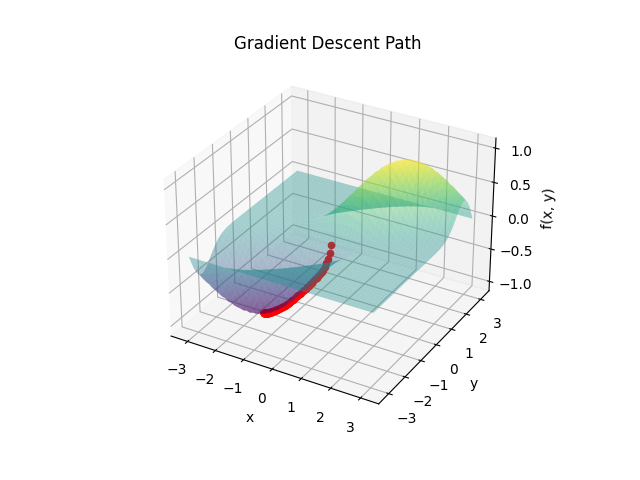

Optimal x: -1.5425062289017262 Optimal y: -1.5487091735363
Optimized value of f4(x, y) is -0.9997176223493089


In [44]:
# Optimize the function f4
plt.cla()
optimal_x4, optimal_y4, opz = grad_desc_2d(f4, df4_dx, df4_dy, xlim4[0], xlim4[1], ylim4[0], ylim4[1], initial_x4, initial_y4, learning_rate4, num_iterations4)
print("Optimal x:", optimal_x4, "Optimal y:", optimal_y4)
print("Optimized value of f4(x, y) is", f4(optimal_x4, optimal_y4))

# Problem 4

The function and its derivative is defined below.

In [8]:
def f5(x):
    return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1

def df5_dx(x):
    return (-4)*((np.cos(x))**3)*(np.sin(x)) - (3 * ((np.sin(x))**2) * np.cos(x)) - (8*np.sin(x)*np.cos(x)) - np.sin(x)

We will use the gradient descent function for 1D that was defined in problem 1.

In [20]:
range_x5 = [0, 2 * np.pi]

initial_x5 = 3
learning_rate5 = 0.05
num_iterations5 = 1000

In [21]:
# Optimize the function f5
optimal_x5 = grad_desc(f5, df5_dx, range_x5[0], range_x5[1], learning_rate5, num_iterations5, initial_x5)
print("Optimal x:", optimal_x5)
print("Optimized value of f5(x) is", f5(optimal_x5))

Optimal x: 1.661660812043789
Optimized value of f5(x) is -4.045412051572552


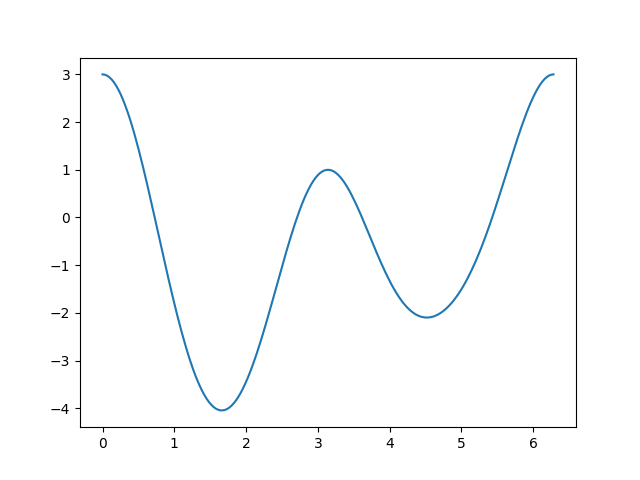

In [16]:
# Create the axis and function
plt.cla()
xbase = np.linspace(0, 2*np.pi, 200)
ybase = f5(xbase)
plt.plot(xbase, ybase)

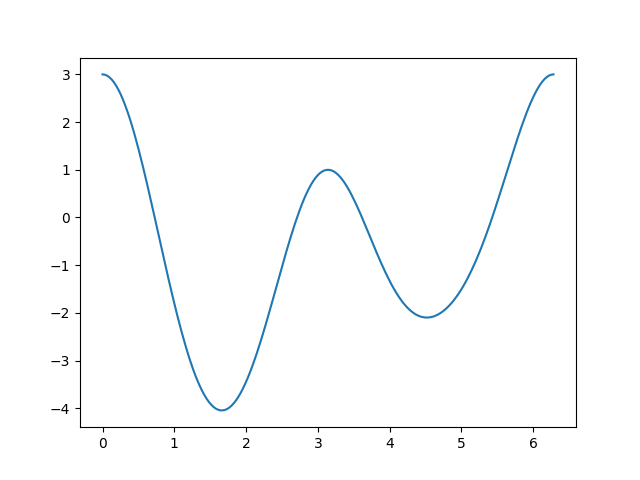

In [19]:
# Create a figure and axis for the animation

# Modifying given code. 
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 3
rangemin, rangemax = 0, 2*np.pi 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.05

# function that acts as a feeder function to FuncAnimate so that we can animate our gradient descent based optimization
def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df5_dx(bestx) * lr 
    bestx = x
    y = f5(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    
ani= FuncAnimation(fig, onestepderiv, frames=range(1000), interval=500, repeat=False)
plt.show()